In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import scale

from sklearn.ensemble import StackingClassifier

import time

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn. ensemble import BaggingClassifier, AdaBoostClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
data = pd.read_csv('C:/Users/aydan/PycharmProjects/pythonProject/non.csv')

In [ ]:
data.head(5)

,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,2,3248.018958,27396916.74,490421.04,0.02,-64.935074,155980.31,135969.75,157416.25,157364.67,-4029.4458,3421.4688,45.039349,0
1,6,1767.341004,25848800.15,490421.04,0.02,-35.312180,139807.55,141797.41,169440.41,-167659.28,-24503.4220,1833.4268,47.767147,0
2,11,4288.248192,27044269.98,490421.04,0.02,-85.755832,133518.86,142117.50,151754.48,-151718.48,3305.0427,3945.3840,44.154415,0
3,2,3248.301172,27396904.11,490421.06,0.02,-64.942485,159911.63,126664.05,154882.05,-153994.64,-16555.9820,3423.5537,45.070129,0
4,6,1767.209671,25848793.32,490421.06,0.02,-35.330100,180763.14,161273.06,201418.02,-201404.39,2342.7332,1830.5529,47.645790,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
new= scaler.fit_transform(data)

new=pd.DataFrame(new,columns=data.columns)
new


,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,0.000000,0.806305,0.415766,0.000000,1.0,0.206477,0.618722,0.505664,0.782860,0.803590,0.440563,0.882718,0.556890,0.0
1,0.181818,0.606212,0.021663,0.000000,1.0,0.206570,0.547274,0.532368,0.810236,0.154494,0.392411,0.583952,0.810768,0.0
2,0.409091,0.946878,0.325993,0.000000,1.0,0.206412,0.519492,0.533835,0.769970,0.186329,0.457813,0.981285,0.474528,0.0
3,0.000000,0.806343,0.415763,0.000071,1.0,0.206477,0.636090,0.463022,0.777090,0.181783,0.411102,0.883110,0.559755,0.0
4,0.181818,0.606194,0.021661,0.000071,1.0,0.206570,0.728208,0.621612,0.883041,0.087102,0.455549,0.583411,0.799473,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,0.409091,0.871892,0.274829,0.998860,1.0,0.206447,0.522311,0.496067,0.762621,0.780443,0.516978,0.927153,0.474452,1.0
10050,0.409091,0.872587,0.274814,0.999145,1.0,0.206447,0.476030,0.414433,0.716147,0.240053,0.517964,0.925716,0.475172,1.0
10051,0.409091,0.871042,0.274799,0.999430,1.0,0.206448,0.389721,0.427214,0.706954,0.737102,0.447532,0.926751,0.464687,1.0
10052,0.409091,0.867724,0.274784,0.999715,1.0,0.206449,0.467719,0.467595,0.723768,0.749654,0.410047,0.926501,0.470257,1.0


In [ ]:
# data.isnull().sum()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = new.drop('Output', axis=1)
y = new['Output'].astype('int')


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42, shuffle = True)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(new,columns=data.columns)

X_test = sc.transform(X_test)
X_test=pd.DataFrame(new,columns=data.columns)


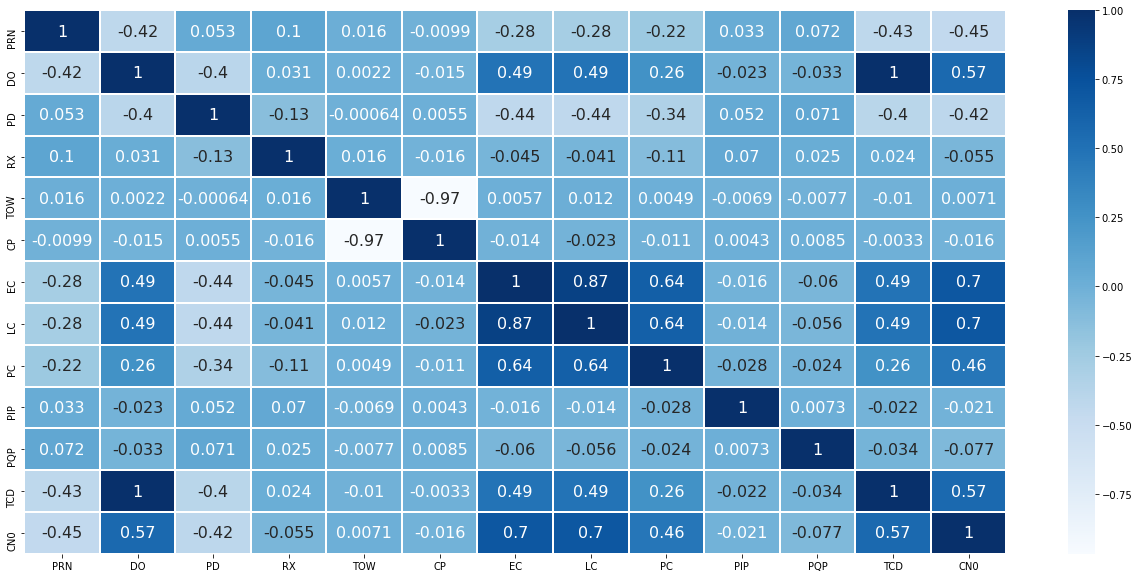

pandas.core.frame.DataFrame

In [ ]:
plt.figure(figsize=(22,10))
cor = X.corr()

sns.heatmap(cor, annot=True, cmap='Blues', annot_kws={'size':16},linewidth=1)
plt.show()
type(X_train)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra=extra.fit(X, y)


ext=pd.DataFrame(extra.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=True)

,extratrees
7,0.010398
9,0.014590
6,0.015140
10,0.021107
8,0.024542
12,0.053869
1,0.055171
0,0.055510
11,0.080191
5,0.135967


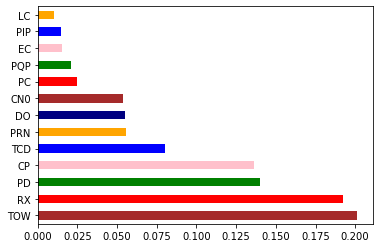

In [ ]:
ext=pd.DataFrame(extra.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=True)

#print(clf_sel.feature_importances_)
feat_importances = pd.Series(extra.feature_importances_, index=data.drop(['Output'], axis=1).columns)
#print(feat_importances)
feat_importances.nlargest(13).plot(kind='barh',color=['brown', 'red', 'green', 'pink','blue','orange','navy',])
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # ALL correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))
# X_train.drop(corr_features,axis=1)
# X_test.drop(corr_features,axis=1)
corr_features

{'TCD', 'TOW'}

In [ ]:
new1=new.drop(['TCD','RX','DO','EC'],axis=1)

In [ ]:
X = new1.drop('Output', axis=1)
y = new1['Output'].astype('int')


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42, shuffle = True)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
dt = DecisionTreeClassifier(random_state=40, max_depth=2)

In [ ]:
lr = LogisticRegression()


In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# parameters


In [ ]:
model_params1 = {
           'Bagging classifier': {
        'model': BaggingClassifier(random_state=1),
       'params': {}
    }
}

model_params6 = {
           'Stacking Classifier': {
        'model': sclf,
       'params': { 'final_estimator__warm_start': [False],
 'final_estimator__verbose': [0],
 'verbose': [0]}
    }
}



model_params5 = {
           'Gradient Tree Boost': {
        'model':  gradmodel,
       'params': { 'n_estimators': [40, 42],'min_impurity_decrease':[0.1,10.0],'max_depth':[3,10,40],'min_weight_fraction_leaf':[0.1,10.0]}
    },
 }




# STACKING

In [ ]:
from sklearn.linear_model import SGDClassifier
import lightgbm as lgb
sdgc = SGDClassifier()
from sklearn.naive_bayes import MultinomialNB
multi= MultinomialNB()
estimators = [('dt',multi),
              ('rf',rf),
              ('lr', lr),
              ('knn', knn),
              ('nb', nb),


             ]
sclf = StackingClassifier(estimators=estimators,final_estimator=lr)

# sclf.get_params()


ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []
for model_name, mp in model_params6.items():
    clf6 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf6.fit(X_train,y_train)
    scores.append({
        'Current model': model_name,
        'Best selected score': clf6.best_score_,
        '#######Best selected parameters#####': clf6.best_params_
    })


df6 = pd.DataFrame(scores,columns=['Current model','Best selected score','#######Best selected parameters#####'])
df6


,Current model,Best selected score,#######Best selected parameters#####
0,Stacking Classifier,0.762652,"{'final_estimator__verbose': 0, 'final_estimat..."


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1082
           1       0.83      0.78      0.81       929

    accuracy                           0.83      2011
   macro avg       0.83      0.82      0.82      2011
weighted avg       0.83      0.83      0.83      2011

0.7804090419806243 0.18853974121996303 0.13493530499075784


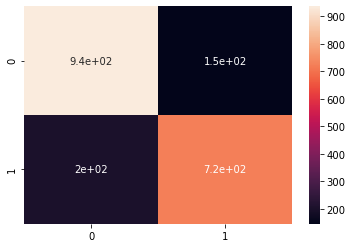

In [ ]:
clf6.fit(X_test,y_test)
y_pre=clf6.predict(X_test)


CM=confusion_matrix(y_test, y_pre)
sns.heatmap(CM,annot=True)
print(classification_report(y_test,y_pre))


try:
    TN = CM[0][0]
except IndexError:
    TN = 0
try:
    FN = CM[1][0]
except IndexError:
    FN = 0
try:
    TP = CM[1][1]
except IndexError:
    TP = 0
try:
    FP = CM[0][1]
except IndexError:
    FP = 0

# #True negative rate
# TNR = TN/(TN+FP)

# # Negative predictive value
# NPV = TN/(TN+FN)

# # False positive rate
# FPR = FP/(FP+TN)

# # false negative rate
# FNR = FN/(TP+FN)




# True positive rate(probability of detection)
TPR = TP/(TP+FN)

# Probability of misdetection
PPV = FN/(TN+FP)

# probability of false alarm
FDR = FP/(TN+FP)


print(TPR,PPV,FDR)


In [ ]:
start2 = time.time()
print("start time is==>", start2)
from sklearn import metrics
sclf.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end3 = time.time()
print('end time is==>',end3)
print('processing time is==>',end3 - start2)

In [ ]:
sclf.get_params(deep=True)

{'cv': None,
 'estimators': [('dt', DecisionTreeClassifier(max_depth=2, random_state=40)),
  ('rf', RandomForestClassifier()),
  ('lr', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('nb', BernoulliNB())],
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_estimator__dual': False,
 'final_estimator__fit_intercept': True,
 'final_estimator__intercept_scaling': 1,
 'final_estimator__l1_ratio': None,
 'final_estimator__max_iter': 100,
 'final_estimator__multi_class': 'auto',
 'final_estimator__n_jobs': None,
 'final_estimator__penalty': 'l2',
 'final_estimator__random_state': None,
 'final_estimator__solver': 'lbfgs',
 'final_estimator__tol': 0.0001,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': LogisticRegression(),
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'dt': DecisionTreeClassifier(max_depth=2, random_state=40),
 'rf': RandomForestClassifier(),
 'lr': LogisticReg


# BOOSTING

In [ ]:
start4 = time.time()
print("start time is==>", start4)
from sklearn import metrics
grad.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = grad.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end5 = time.time()
print('end time is==>',end5)
print('prediction time is==>',end5 - start4)

start time is==> 1643505382.1222162
Accuracy: 0.8667329686723023
end time is==> 1643505382.8878958
prediction time is==> 0.7656795978546143


# Model size in memory (Bytes)

In [ ]:
# sys.getsizeof(bg)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []


for model_name, mp in model_params1.items():
    clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf1.fit(X_train,y_train)
    scores.append({
        'Current model': model_name,
        'Best selected score': clf1.best_score_,
        '#######Best selected parameters#####': clf1.best_params_
    })

df1 = pd.DataFrame(scores,columns=['Current model','Best selected score','#######Best selected parameters#####'])
df1


Second : 1
Microsecond : 777448
Second : 3
Microsecond : 386961
Wall time: 1.61 s


,Current model,Best selected score,#######Best selected parameters#####
0,Bagging classifier,0.953749,{}



# prediction time per sample